In [1]:
from qiskit import IBMQ
import qiskit
qiskit.__qiskit_version__

{'qiskit-terra': '0.13.0',
 'qiskit-aer': '0.5.0',
 'qiskit-ignis': '0.3.0',
 'qiskit-ibmq-provider': '0.6.0',
 'qiskit-aqua': '0.6.5',
 'qiskit': '0.18.0'}

In [2]:
provider = IBMQ.load_account()
#provider = IBMQ.get_provider(hub='ibm-q-ncsu', group='nc-state', project='on-boarding')
provider = IBMQ.get_provider(hub='ibm-q', group='open', project='main')
provider.backends()

[<IBMQSimulator('ibmq_qasm_simulator') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmqx2') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_16_melbourne') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_vigo') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_ourense') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_london') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_burlington') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_essex') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_armonk') from IBMQ(hub='ibm-q', group='open', project='main')>]

In [3]:
import math
import numpy as np
import random
import re
import qiskit.tools.jupyter

from qiskit import *
from qiskit.compiler import transpile
from qiskit.visualization import plot_histogram
from qiskit.tools.monitor import job_monitor

from qiskit.transpiler import PassManager
from qiskit.transpiler import CouplingMap, Layout
from qiskit.transpiler.passes import StochasticSwap, BasicSwap

from qiskit.tools.monitor import job_monitor, backend_monitor, backend_overview
%matplotlib inline

In [5]:
from qiskit.transpiler import PassManagerConfig
from qiskit.transpiler.coupling import CouplingMap
from statistics import mean
from passmanager import level_3_with_contant_pure
from benchmark.suites.qpe import QPE

In [6]:
device = provider.get_backend('ibmq_16_melbourne')
backend_monitor(device)
device

ibmq_16_melbourne
Configuration
-------------
    n_qubits: 15
    operational: True
    status_msg: active
    pending_jobs: 2
    backend_version: 2.0.6
    basis_gates: ['id', 'u1', 'u2', 'u3', 'cx']
    local: False
    simulator: False
    memory: True
    url: None
    max_experiments: 75
    online_date: 2018-11-06T05:00:00+00:00
    n_registers: 1
    quantum_volume: None
    conditional: False
    sample_name: albatross
    allow_q_object: True
    credits_required: True
    backend_name: ibmq_16_melbourne
    allow_object_storage: True
    coupling_map: [[0, 1], [0, 14], [1, 0], [1, 2], [1, 13], [2, 1], [2, 3], [2, 12], [3, 2], [3, 4], [3, 11], [4, 3], [4, 5], [4, 10], [5, 4], [5, 6], [5, 9], [6, 5], [6, 8], [7, 8], [8, 6], [8, 7], [8, 9], [9, 5], [9, 8], [9, 10], [10, 4], [10, 9], [10, 11], [11, 3], [11, 10], [11, 12], [12, 2], [12, 11], [12, 13], [13, 1], [13, 12], [13, 14], [14, 0], [14, 13]]
    description: 15 qubit device
    max_shots: 8192
    open_pulse: False
    al

<IBMQBackend('ibmq_16_melbourne') from IBMQ(hub='ibm-q', group='open', project='main')>

In [7]:
simulator = provider.get_backend('ibmq_qasm_simulator')

In [8]:
seed = 0
pmconfig = PassManagerConfig(
            initial_layout=None,
            basis_gates=['u1', 'u2', 'u3', 'cx', 'id'],
            coupling_map=CouplingMap(device.configuration().coupling_map),
            backend_properties=device.properties(),
            seed_transpiler=seed)

In [9]:
pm = level_3_with_contant_pure(pmconfig)

In [11]:
QCList = []
for i in range(3, 7):
    QCList.append(transpile(QPE(nbits = i),device, optimization_level = 3))
    QCList.append(pm.run(QPE(nbits = i)))

In [42]:
QCList[0].count_ops()

OrderedDict([('cx', 23),
             ('u2', 17),
             ('u3', 9),
             ('u1', 6),
             ('measure', 3),
             ('barrier', 1)])

In [43]:
QCList[1].count_ops()

OrderedDict([('u2', 15),
             ('cx', 15),
             ('u1', 8),
             ('u3', 4),
             ('measure', 3),
             ('barrier', 1)])

In [27]:
from qiskit.qobj.utils import MeasLevel, MeasReturnType
from qiskit.pulse import Schedule
from qiskit.exceptions import QiskitError

In [28]:
qobj = assemble(QCList,
            qobj_id=None, qobj_header=None,
            shots=8192,
            memory=False, max_credits=10, seed_simulator=None,
            default_qubit_los=None, default_meas_los=None,  # schedule run options
            schedule_los=None, meas_level=MeasLevel.CLASSIFIED,
            meas_return=MeasReturnType.AVERAGE,
            memory_slots=None, memory_slot_size=100, rep_time=None, parameter_binds=None,
            backend=device,
            )

In [33]:
job2 = device.run(qobj)
job_monitor(job2)
res2 = job2.result()

Job Status: job has successfully run


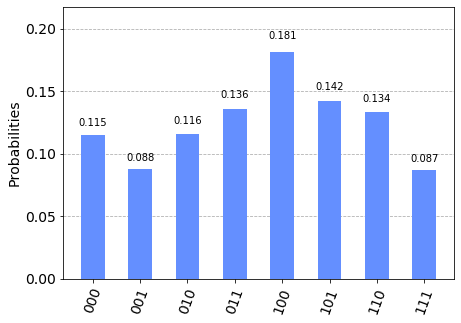

In [34]:
plot_histogram(res2.get_counts()[0])

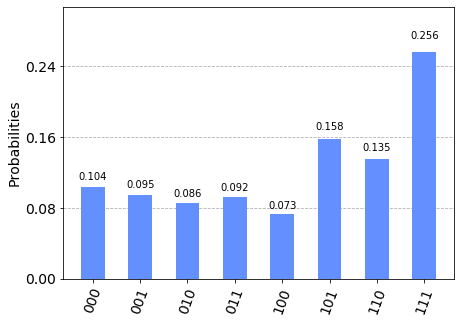

In [35]:
plot_histogram(res2.get_counts()[1])

In [38]:
plot_histogram(res2.get_counts()[0]).savefig('melbournelevel3.pdf')

In [39]:
plot_histogram(res2.get_counts()[1]).savefig('melbourneour.pdf')

In [40]:
#level3 result
res2.get_counts()[0]

{'000': 942,
 '111': 716,
 '001': 721,
 '101': 1166,
 '110': 1094,
 '011': 1117,
 '100': 1484,
 '010': 952}

In [41]:
#our result
res2.get_counts()[1]

{'000': 850,
 '111': 2094,
 '001': 780,
 '101': 1298,
 '110': 1107,
 '011': 755,
 '100': 601,
 '010': 707}